### importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### loading dataset

In [2]:
df= pd.read_csv("D:\ds\credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### dropping duplicates

In [3]:
df.drop_duplicates(inplace=True)

### figuring out missing values

In [4]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.cb_person_default_on_file.value_counts() #ordinal

N    26686
Y     5730
Name: cb_person_default_on_file, dtype: int64

In [7]:
df.loan_grade.value_counts() #ordinal

A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: loan_grade, dtype: int64

In [8]:
df.loan_intent.value_counts() #nominal

EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: loan_intent, dtype: int64

In [9]:
 df.person_home_ownership.value_counts() #nominal

RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: person_home_ownership, dtype: int64

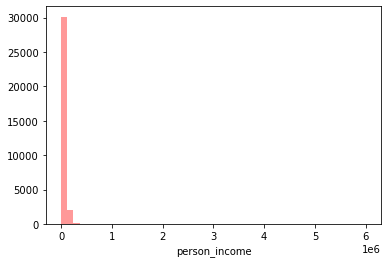

In [10]:
sns.distplot(df['person_income'],kde = False, color='red')
plt.show()

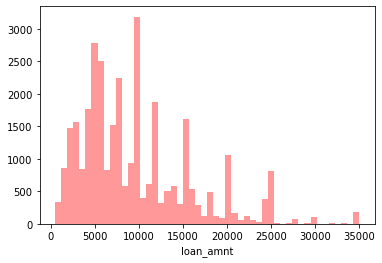

In [11]:
sns.distplot(df['loan_amnt'],kde = False, color='red')
plt.show()

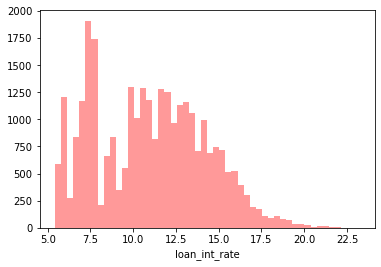

In [12]:
sns.distplot(df['loan_int_rate'],kde = False, color='red')
plt.show()

### outliers

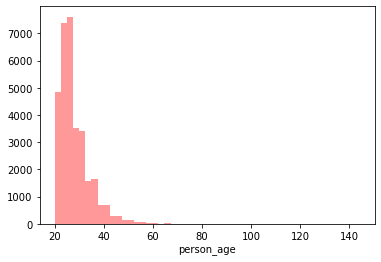

In [13]:
sns.distplot(df['person_age'],kde = False, color='red')
plt.show()

In [14]:
df = df.loc[df['person_age']<75, :]

In [15]:
df.shape

(32406, 12)

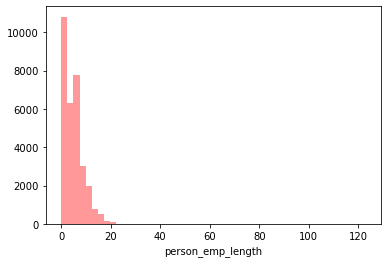

In [16]:
sns.distplot(df['person_emp_length'],kde = False, color='red')
plt.show()

In [17]:
df[df['person_emp_length']>60]

#0,216

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [18]:
df.drop([0,216], axis=0, inplace=True)

df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [19]:
df.shape

(32404, 12)

In [20]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [21]:
#encoding

df.replace({'person_home_ownership': {'RENT':0, 'MORTGAGE':1, 'OWN':2, 'OTHER': 3}}, inplace=True)

df.replace({'loan_intent': {'EDUCATION':0 , 'MEDICAL':1, 'VENTURE':2, 'PERSONAL':3, 'DEBTCONSOLIDATION':4, 'HOMEIMPROVEMENT':5}}, inplace=True)

df.replace({'loan_grade': {'G':0 , 'F':1, 'E':2, 'D':3, 'C':4, 'B':5, 'A':6}}, inplace=True)

df.replace({'cb_person_default_on_file': {'Y':0 , 'N':1}}, inplace=True)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('loan_status', axis=1), df['loan_status'], random_state=0, 
                                                    test_size=0.3, stratify=df['loan_status'], shuffle=True)

In [24]:
x_train.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              633
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2185
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [25]:
from sklearn.compose import ColumnTransformer

### imputing missing values

In [26]:


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [27]:
transf1 = ColumnTransformer( [
    ('impute_person_emp_length' , IterativeImputer(), [3]),
    ('impute_loan_int_rate' , IterativeImputer(), [7])
   
] , remainder='passthrough')

### standardization

In [29]:

from sklearn.preprocessing import MinMaxScaler #minmax when not normally distributed

In [30]:
transf3 = ColumnTransformer([
    ('scale' , MinMaxScaler(), slice(0,11))
    
])



In [31]:
#feature selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [32]:
#transf4 = SelectKBest(score_func=chi2, k=7)

###  creating pipelines

In [33]:
from sklearn.pipeline import Pipeline, make_pipeline


### model selection

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [35]:

transf5 = RandomForestClassifier()

In [36]:
pipeln = Pipeline(steps=[
    ('transf1', transf1),
    
    ('transf3', transf3),
   
    ('transf5', transf5)
    
])

In [37]:
from sklearn import set_config
set_config(display='diagram')

In [38]:
# training 

pipeln.fit(x_train, y_train)

Pipeline(steps=[('transf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_person_emp_length',
                                                  IterativeImputer(), [3]),
                                                 ('impute_loan_int_rate',
                                                  IterativeImputer(), [7])])),
                ('transf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 11, None))])),
                ('transf5', RandomForestClassifier())])

In [39]:
x_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
24345,29,48000,0,4.0,1,5,10000,10.62,0.21,1,10
18928,28,29000,2,1.0,2,4,6250,12.87,0.22,0,9
18059,30,190000,0,3.0,4,5,15000,11.48,0.08,1,8
5012,24,43000,1,3.0,3,6,11500,7.88,0.27,1,2
10699,21,32400,0,2.0,1,4,10000,13.23,0.31,1,4
...,...,...,...,...,...,...,...,...,...,...,...
19600,28,35000,1,12.0,0,6,12000,5.99,0.34,1,8
9698,24,100000,0,8.0,1,4,8400,13.06,0.08,1,4
12049,22,79000,1,6.0,1,6,10375,6.62,0.13,1,4
20984,29,51000,0,1.0,4,6,5000,8.00,0.10,1,6


In [40]:
pipeln.named_steps

{'transf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_person_emp_length', IterativeImputer(),
                                  [3]),
                                 ('impute_loan_int_rate', IterativeImputer(),
                                  [7])]),
 'transf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 11, None))]),
 'transf5': RandomForestClassifier()}

In [41]:
y_pred = pipeln.predict(x_test)

In [42]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### accuracy

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9311869985599671

In [44]:
import pickle


In [45]:
pickle.dump(pipeln, open('pipeln.pkl', 'wb'))